In [1]:
import bokeh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
train, test = pd.read_csv('kdd/binary/Training.csv', header=None), pd.read_csv('kdd/binary/Testing.csv', header=None)

In [3]:
train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,1,1,1,181,5450,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1,1,239,486,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,0,1,1,1,235,1337,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,0,1,1,1,219,1337,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,0,1,1,1,217,2032,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [4]:
test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,2,24,1,105,146,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24,1,105,146,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,0,2,24,1,105,146,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,1,0,2,24,1,105,146,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,1,0,2,24,1,105,146,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


In [5]:
X, Y = train.iloc[:,1:42].values, train.iloc[:,0]

In [6]:
import seaborn as sns
sns.set(style='white')

In [7]:
corr = train.corr()

In [8]:
corr

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.000000,-0.118014,0.497755,0.663713,0.165336,0.000936,-0.037709,0.002542,0.023630,-0.001498,...,0.642110,-0.062566,-0.109950,-0.115901,0.481458,-0.204958,0.227205,0.227975,0.000860,0.003404
1,-0.118014,1.000000,-0.023715,-0.033369,-0.020218,0.004258,0.005440,-0.000452,-0.003235,0.003786,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
2,0.497755,-0.023715,1.000000,0.896438,-0.650347,-0.002664,-0.032433,-0.008262,-0.005357,-0.003183,...,0.385535,0.711421,0.692295,-0.260154,0.956481,-0.117590,-0.574551,-0.573439,-0.309225,-0.308833
3,0.663713,-0.033369,0.896438,1.000000,-0.427262,0.001068,-0.034926,0.003482,-0.030403,-0.001939,...,0.494884,0.424386,0.405005,-0.173495,0.858261,-0.151532,-0.339265,-0.338541,-0.239450,-0.237884
4,0.165336,-0.020218,-0.650347,-0.427262,1.000000,0.002723,-0.013452,0.009090,-0.025069,-0.001351,...,0.042798,-0.811538,-0.821898,0.264174,-0.624489,0.057414,0.630482,0.629130,0.686992,0.687932
5,0.000936,0.004258,-0.002664,0.001068,0.002723,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
6,-0.037709,0.005440,-0.032433,-0.034926,-0.013452,-0.000002,1.000000,-0.000175,-0.001254,0.016288,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
7,0.002542,-0.000452,-0.008262,0.003482,0.009090,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
8,0.023630,-0.003235,-0.005357,-0.030403,-0.025069,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
9,-0.001498,0.003786,-0.003183,-0.001939,-0.001351,-0.000005,0.016288,-0.000017,-0.000123,1.000000,...,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641


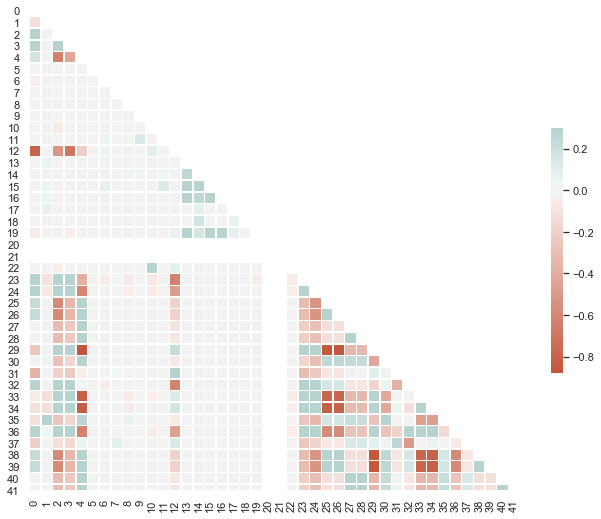

In [20]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(20, 180, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Shows that only columns [1-4][12][23-41] have any correlation
### * 23 features to consider

In [21]:
corr_train = train.iloc[:,1:42]
corr_test = test.iloc[:,0]

In [22]:
corr_train.corr()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
1,1.000000,-0.023715,-0.033369,-0.020218,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
2,-0.023715,1.000000,0.896438,-0.650347,-0.002664,-0.032433,-0.008262,-0.005357,-0.003183,-0.054640,...,0.385535,0.711421,0.692295,-0.260154,0.956481,-0.117590,-0.574551,-0.573439,-0.309225,-0.308833
3,-0.033369,0.896438,1.000000,-0.427262,0.001068,-0.034926,0.003482,-0.030403,-0.001939,-0.005489,...,0.494884,0.424386,0.405005,-0.173495,0.858261,-0.151532,-0.339265,-0.338541,-0.239450,-0.237884
4,-0.020218,-0.650347,-0.427262,1.000000,0.002723,-0.013452,0.009090,-0.025069,-0.001351,-0.021903,...,0.042798,-0.811538,-0.821898,0.264174,-0.624489,0.057414,0.630482,0.629130,0.686992,0.687932
5,0.004258,-0.002664,0.001068,0.002723,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
6,0.005440,-0.032433,-0.034926,-0.013452,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
7,-0.000452,-0.008262,0.003482,0.009090,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
8,-0.003235,-0.005357,-0.030403,-0.025069,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
9,0.003786,-0.003183,-0.001939,-0.001351,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,...,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
10,0.013213,-0.054640,-0.005489,-0.021903,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,...,-0.026366,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749


In [23]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,0.803089,47.979302,2.189338,38.995435,2.391617,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,0.397665,707.746472,0.960704,19.698954,2.649054,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,24.000000,1.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,54.000000,1.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,3.000000,54.000000,1.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,58329.000000,3.000000,70.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Count')

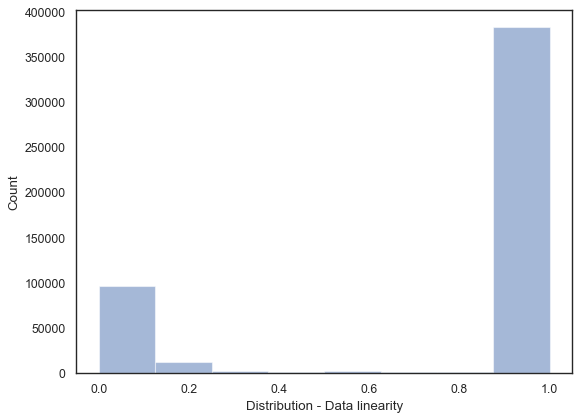

In [25]:
bins=8
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
n, b, patches = plt.hist(X[:,28],bins, alpha=0.5)
plt.xlabel('Distribution - Data linearity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

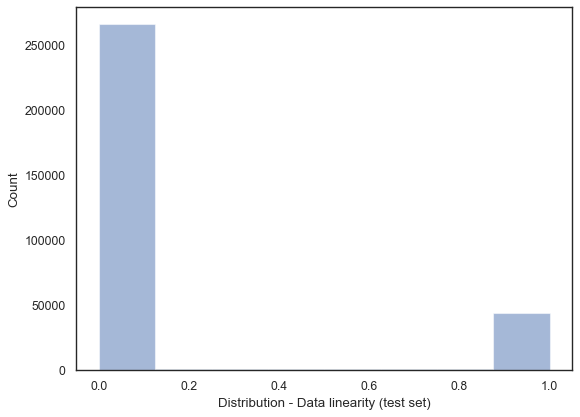

In [26]:
bins=8
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
n, b, patches = plt.hist(test.iloc[:,27],bins, alpha=0.5)
plt.xlabel('Distribution - Data linearity (test set)')
plt.ylabel('Count')

In [27]:
c_0 = np.where(Y!=1)
len(c_0[0])
print("Class balances : Positive Samples : {}\nNegative Samples : {}".format(len(Y)-len(c_0[0]),len(c_0[0])))
print("\n")
#check if data is randomly distributed, sample
count=0
for i in range(1,len(Y)):
    try:
        if Y[i-1]!=Y[i]:
            count+=1
            print("Class : {}".format(Y[i]))
            print("Index : {}".format(i))
    except:
        pass
    if count==10:
        break

Class balances : Positive Samples : 396743
Negative Samples : 97278


Class : 1
Index : 744
Class : 0
Index : 746
Class : 1
Index : 4049
Class : 0
Index : 4050
Class : 1
Index : 4113
Class : 0
Index : 4114
Class : 1
Index : 7601
Class : 0
Index : 7603
Class : 1
Index : 7793
Class : 0
Index : 11488


In [28]:
class_0, class_1 = [],[]
for idx,row in train.iterrows():
    if Y[idx]==0:
        class_0.append(row)
    else:
        class_1.append(row)

In [29]:
print("Class 0:\n",class_0[:1])
print("Class 1:\n",class_1[:1])

Class 0:
 [0        0.00
1        0.00
2        1.00
3        1.00
4        1.00
5      181.00
6     5450.00
7        0.00
8        0.00
9        0.00
10       0.00
11       0.00
12       1.00
13       0.00
14       0.00
15       0.00
16       0.00
17       0.00
18       0.00
19       0.00
20       0.00
21       0.00
22       0.00
23       8.00
24       8.00
25       0.00
26       0.00
27       0.00
28       0.00
29       1.00
30       0.00
31       0.00
32       9.00
33       9.00
34       1.00
35       0.00
36       0.11
37       0.00
38       0.00
39       0.00
40       0.00
41       0.00
Name: 0, dtype: float64]
Class 1:
 [0        1.00
1      184.00
2        1.00
3       13.00
4        1.00
5     1511.00
6     2957.00
7        0.00
8        0.00
9        0.00
10       3.00
11       0.00
12       1.00
13       2.00
14       1.00
15       0.00
16       0.00
17       1.00
18       0.00
19       0.00
20       0.00
21       0.00
22       0.00
23       1.00
24       1.00
25       0.00
2

In [30]:
c0_corr = pd.DataFrame(class_0).corr()

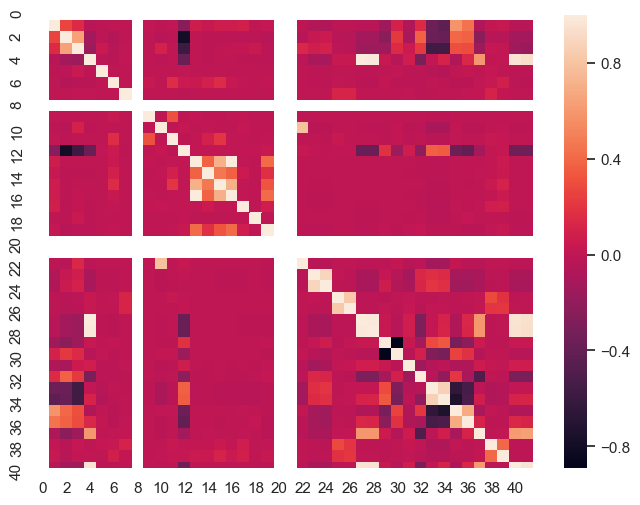

In [31]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.heatmap(c0_corr)

In [32]:
c1_corr = pd.DataFrame(class_1).corr()

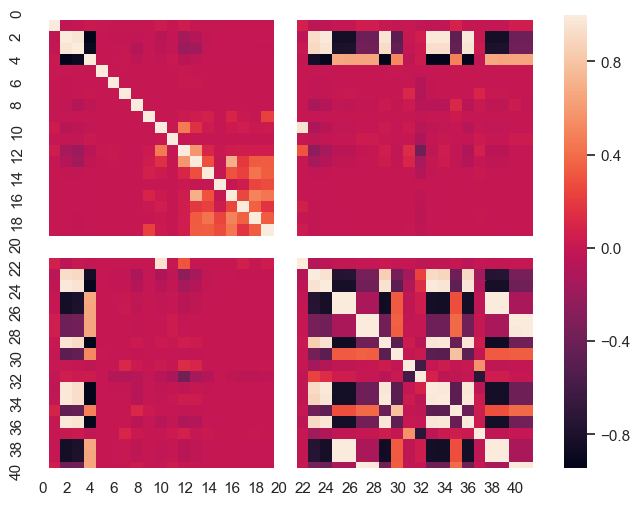

In [34]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.heatmap(c1_corr)

# Notable changes in the heatmaps of features :
### - Same features interact differently within different classes
### - Well defined structure for classification is probable